In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Un diagrama de caja, a veces llamado diagrama de caja y bigotes, es un método para mostrar estadísticas agregadas de varias muestras de manera concisa. El objetivo del diagrama de caja es resumir la distribución de sus datos a través de una visualización de lo que se llama **el resumen de 5 números: los extremos, a menudo los valores mínimo y máximo, el centro, generalmente la mediana de los datos, y el primero y terceros cuartiles de sus datos**. Los cuartiles de sus datos los dividen en cuatro cubos de tamaño aproximadamente similar, por lo que los marcadores del primer y tercer cuartiles, a veces llamados bisagras, le muestran el 50% medio de sus datos. A través del diagrama de caja podemos tener una idea de la ponderación de los datos en una representación visual bastante compacta.

In [2]:
# Now let's create three different samples from NumPy - One for the normal distribution,
# one for random, and one from a gamma distribution. 

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# Next, let's put those in a pandas DataFrame.
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,-0.504115,0.290746,1.903952
1,-0.187843,0.994383,2.096915
2,-0.902405,0.236427,1.550445
3,-0.026441,0.727042,1.714117
4,-1.957279,0.796949,0.794953
...,...,...,...
9995,0.743958,0.877305,3.758708
9996,-1.715300,0.616487,0.250654
9997,0.831785,0.354651,0.107147
9998,-0.988485,0.328162,0.149832


In [3]:
# Utilizando la funcion describe() podemos ver datos que nos mostrara el boxplot
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.006014,0.500474,2.002912
std,0.992080,0.289137,1.420637
min,-4.176927,0.000116,0.010817
25%,-0.670474,0.249671,0.952699
50%,0.003761,0.496047,1.684546
75%,0.666566,0.748864,2.715650
max,3.559092,0.999968,12.379281


<AxesSubplot:>

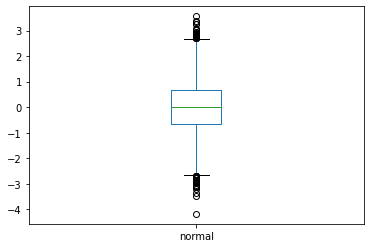

In [5]:
# Para ver un diagrama de caja, simplemente elegimos la columna del marco de datos que nos interesa y la pasamos
# a la función boxplot de pyplot. matplotlib usa matrices numpy para datos, pero dado que pandas está construido
# además de las cosas numpy funcionan con fluidez
df.boxplot(['normal'], grid=False)

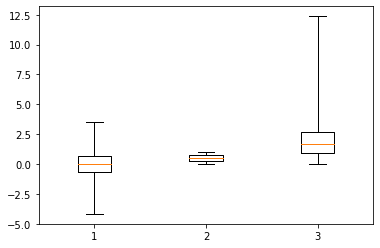

In [10]:
# Desafortunadamente, no podemos simplemente pasar un marco de datos de pandas completo a matplotlib.
# En su lugar, debemos sacar cada columna y enviarlas como una lista de valores.
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0,100]);

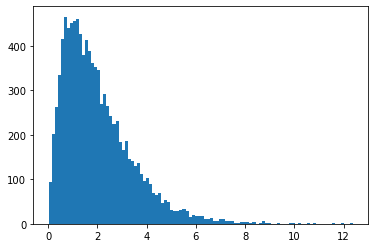

In [13]:
# Veamos particularmente la distribicion gamma
plt.hist(df['gamma'], bins=100);

### Sobreponer los ejes con "inset_axes" y colocar un grafico sobre otro

Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have one axes object. We can actually overlay an axes on top of another within a figure. We do this by calling the **inset_axes function** on the figure and sending in details of the new axes that we want to create. The details we send are a position in x/y space and the width and height of the new plot.

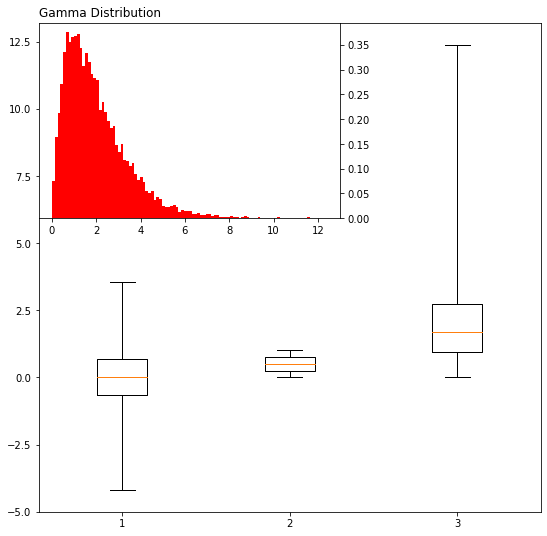

In [23]:
plt.figure(figsize=(9,9))
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0,100])

# ¡Ahora grafiquemos en esos ejes un nuevo objeto de ejes! Esto se superpondrá 
# arriba, y proporcionamos un cuadro delimitador de (0,0.6) como la parte inferior izquierda, y
# (0.6,0.4) como ancho y alto. Estas son proporciones del objeto de eje
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4])

# Ya que definimos las coordenadas, podemos plotear nuestro histograma
ax2.hist(df['gamma'], bins=100, density=True, color='r')

# Y dado que el histograma tendrá etiquetas de marca a la izquierda y chocará con
# la figura principal, podemos voltearlas a la derecha
ax2.yaxis.tick_right()
ax2.set_title('Gamma Distribution', loc='left');

### Omitir el parametro whis, para ver facilmente los "outliers"

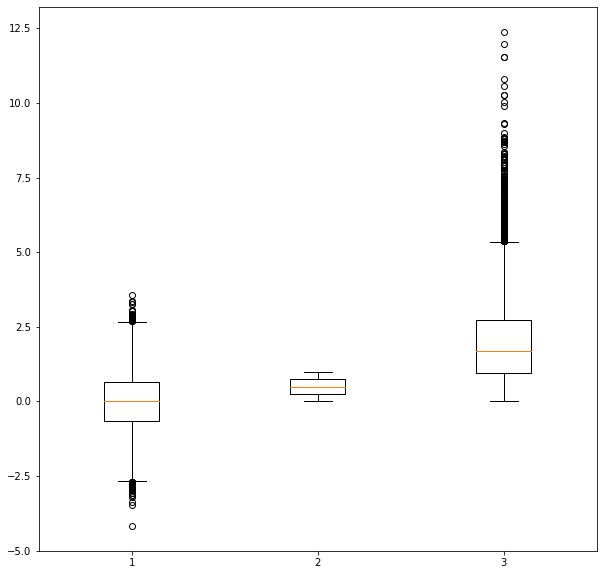

In [24]:
# Nice big figure
plt.figure(figsize=(10,10))
# Now with outliers
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);